# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../data/employee.csv')
employees.sample(2)


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.groupby('Department')[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
employees.pivot_table('Salary', 'Department', aggfunc = 'mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table('Salary', 'Department', 'Title', aggfunc = 'mean')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here

employees.pivot_table(values = ['Salary', 'Years'], index =['Department', 'Title'] )

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
df1 = employees.pivot_table(values = 'Salary', index ='Department', columns ='Title', aggfunc='mean')
df1

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


In [8]:
df2 = employees.pivot_table(values = 'Salary', index = 'Department', columns='Title', aggfunc= 'count')
df2

Title,VP,analyst,associate
Department,,,
HR,1.0,2.0,NaN
IT,1.0,2.0,1.0
Sales,NaN,NaN,2.0


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [9]:
df5 = employees.pivot_table(values = 'Salary', index =['Department', 'Title'], aggfunc=['mean', 'max', 'min', 'std'] )
df5

mean    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [10]:
"""
your commments here
"""
#Salaries across departments are on average very similar, variation comes mostly between Title
#Variations between title are small
#paolo: why do you think you get NaNs?

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
# your code here
df5.fillna(0)
#paolo: ok why zero?

mean    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
# your code here
df6 = employees.pivot_table(values = 'Salary', index ='Department', aggfunc=['sum', 'count'] )
df6


,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [13]:
# your code here
df7 = employees.pivot_table(values = ['Salary', 'Years'], index =['Department', 'Title'], 
                            aggfunc = {'Salary' : 'mean' , 'Years' : 'sum'})
df7

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [14]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [15]:
# your code here
fitbit = pd.read_csv('../data/Fitbit.csv')
fitbit.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
23,31-05-2015,3533,18995,14.11,12,660.0,269,86,43,2092,426,54,33,495
45,22-06-2015,3088,12713,9.48,59,631.0,225,24,44,1533,373,47,23,427
164,19-10-2015,2581,6293,4.68,1,854.0,226,0,0,9560,0,0,0,0


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [16]:
# your code here
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [17]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [18]:
# your code here
df = fitbit[['Minutes Very Active', 'Steps']]
df.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [19]:
import matplotlib.pyplot as plt;

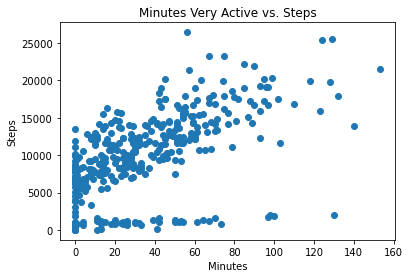

In [20]:
x = df['Minutes Very Active']
y = df['Steps']
plt.scatter(x, y)
plt.title('Minutes Very Active vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [21]:
"""
your commments here
"""
#There is moderate positive correlation between Minutes Very Active and Steps taken

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [22]:
# your code here
df2 = fitbit[['Minutes Sedentary', 'Steps']]
df2.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

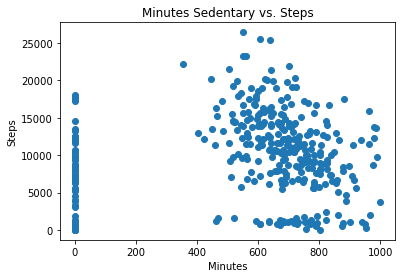

In [23]:
# your code here

x = fitbit['Minutes Sedentary']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()

In [24]:
"""
your commments here
"""
#No real correlation

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [25]:
# your code here
df3 = fitbit[['MinutesOfSleep', 'Steps']]
df3.corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

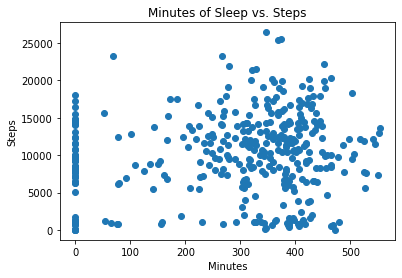

In [26]:
# your code here

x = fitbit['MinutesOfSleep']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes of Sleep vs. Steps')
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.show()

In [27]:
"""
your commments here
"""
#No correlation

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [28]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [29]:
# your code here
cor_fit = fitbit[columns]
cor_fit.sample(3)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
102,3106,10886,19,639.0,20,263
254,2878,9602,0,547.0,15,254
5,276,779,15,726.0,18,405


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [30]:
# your code here
cor_fit.corr().sort_values(['Steps'], ascending = False)

#Minutes very active are the most highly correlated with Steps

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [31]:
# your code here
time_grades = pd.read_csv('../data/Time_Grades.csv')
time_grades.sample(3)

,Name,Study time,Grade
8,Ana,18,9
6,Carlos,12,7
3,Sonia,10,7


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:xlabel='Study time', ylabel='Grade'>

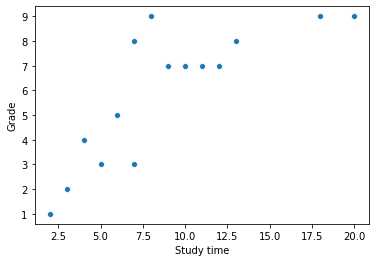

In [40]:
# your code here
import seaborn as sns
sns.scatterplot(x='Study time', y='Grade', data=time_grades)
#paolo:ok but this is not a frequency plot- check lecture on probability with definition of distribution
#paolo: frequency plot for grade (similar for study time) is number of students in  a certain grade range

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [33]:
# your code here
corr_1 = time_grades.corr(method='pearson')
corr_1

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [34]:
corr_2 = time_grades.corr(method='spearman')
corr_2

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [35]:
"""
your commments here
"""
#There is a positive correlation between Study time and grade using both Pearson and Spearman methods 

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

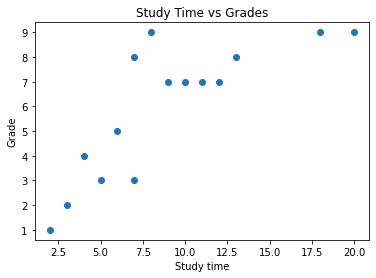

In [36]:
# your code here
x = time_grades['Study time']
y = time_grades['Grade']
plt.scatter(x, y)
plt.title('Study Time vs Grades')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [37]:
"""
your commments here
"""
#Weak positive correlation between Study time and grade

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [38]:
"""
your commments here
"""
#Pearson correlation measures linear relationship between points
#Spearman correlation acknowledges that relationship between points change together but not at the same rate

'\nyour commments here\n'

In [41]:
#paolo check yes!